In [2]:
import numpy as np 
import torch 
import torch.nn as nn
from matplotlib import pyplot as plt 

device = 'cuda' if torch.cuda.is_available else 'cpu'
print(f'Device = {device}')

Device = cuda


In [3]:
def delta1(x, x0):
    """Numerical Dirac delta function at x0
    """
    beta = 0.001
    exp = np.exp(-(x-x0)**2 / beta)
    return exp / np.sqrt(np.pi * beta)


In [4]:
class DNN(nn.Module):
    """Fully connected neural network
    """
    def __init__(self, layer_sizes):
        super(DNN, self).__init__()
        self.layer_sizes = layer_sizes
        self.linears = nn.ModuleList()
        for i in range(1, len(layer_sizes)):
            self.linears.append(nn.Linear(layer_sizes[i-1], layer_sizes[i]))

    def forward(self, x):
        for linear in self.linears[:-1]:
            x = torch.tanh(linear(x))
        x = self.linears[-1](x)
        return x 


In [5]:
def computer_mse_loss(Y_pred, Y_train):
    assert Y_pred.shape == Y_train.shape
    return torch.mean(torch.square(Y_pred-Y_train))

In [6]:
num_samples = 1000

X_train = np.linspace(0, 1, 100)
Y_train = delta1(X_train, x0=0.5)

layer_sizes = [1] + [128] * 5 + [1]
lr = 0.0003
max_niter = 1001

dnn = DNN(layer_sizes)
dnn.to(device)

optimizer = torch.optim.Adam(
    dnn.parameters(),
    lr=lr
)

In [7]:
# Train
for niter in range(max_niter):
    Y = dnn(torch.tensor(X_train[:, np.newaxis], dtype=torch.float32, device=device))
    loss = computer_mse_loss(Y, torch.tensor(Y_train[:, np.newaxis], dtype=torch.float32, device=device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if niter % 100 == 0 or niter == max_niter - 1:
        print('Iter %d, Loss %.4e' % (niter, loss))

Iter 0, Loss 1.2457e+01
Iter 100, Loss 1.1059e+01
Iter 200, Loss 5.8444e-01
Iter 300, Loss 1.1154e-01
Iter 400, Loss 3.6009e-02
Iter 500, Loss 1.1010e-02
Iter 600, Loss 3.0829e-03
Iter 700, Loss 1.1594e-03
Iter 800, Loss 8.2253e-04
Iter 900, Loss 7.2642e-04
Iter 1000, Loss 1.7545e-03


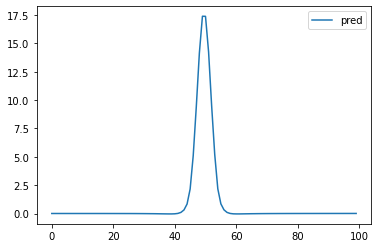

In [8]:
Y_pred = dnn(torch.tensor(X_train[:, np.newaxis], dtype=torch.float32, device=device))
Y_pred = Y_pred.squeeze().detach().cpu().numpy()
plt.plot(Y_pred, label='pred')
#plt.plot(Y_train, label='train')
plt.legend()


In [9]:
# Fit 2d delta
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
X_train = np.c_[X.flatten()[:, np.newaxis], Y.flatten()[:, np.newaxis]]
Y_train = delta2(X_train[:, 0], X_train[:, 1], x0=0.5, y0=0.5).reshape(-1, 1)

layer_sizes = [2] + [128] * 5 + [1]
lr = 0.0003
max_niter = 1001

dnn = DNN(layer_sizes)
dnn.to(device)

optimizer = torch.optim.Adam(
    dnn.parameters(),
    lr=lr
)